# Overview of different Particle Swarm Optimisation methods on the Travelling Salesman Problem 

This notebook aims to run 7 different computational experiments with multiple PSO methods. The primary goal defining the design of these experiments is to analyse effect of heuristic methods on PSO performance across TSP instances.
    
## 1. Introduction
Six different PSO algorithms have been implemented from the literature. Each PSO algorithm incorporates a specially designed local heuristic.

| Algorithm                   | Description                                                                                                                                                                                                                                                                                                                                                                    |
|-----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Particle Swarm Optimization (PSO) | PSO is a population-based optimization technique inspired by the social behavior of bird flocking or fish schooling. Each particle represents a potential solution that is moving through the search space guided by its personal best position (pbest) and the global best position (gbest) found by the swarm.                                                                      |
| Adaptive PSO (APSO)         | APSO introduces an adaptive inertia weight that varies during optimization that balances exploration and exploitation. The inertia weight linearly decreases the velocity from a maximum to a minimum value.                                                                                                                                 |
| Discrete PSO (HPSO)         | HPSO handles discrete optimization problems like the Traveling Salesman Problem. It updates particle positions using a probabilistic approach based on the sigmoid function applied to the particle's velocity.                                                                                                                                                             |
| Spatial PSO (SPSO)          | SPSO incorporates spatial information by considering each particle's neighborhood. Velocity updates are influenced by the best positions found within the particle's neighborhood.                                                                                                                                                               |
| Differential Evolution PSO (DEPSO) | DEPSO combines Differential Evolution (DE) and PSO. It employs the DE crossover operator to generate new candidate solutions. These solutions are then integrated into the particle's position update process.                                                                                                                                                                |
| Predator-Prey PSO (PPPSO)   | PPPSO introduces a predator particle that follows the global best position which influences the other particles' movement. Particles attempt to evade the predator while still being guided by their personal and global best positions.                                                                                                     |



## 2. Literature Review
Particle Swarm Optimization (PSO) has been successfully applied to the Traveling Salesman Problem (TSP) due to its ability to efficiently explore the search space and find near-optimal solutions. The TSP is a well-known NP-hard combinatorial optimization problem that aims to find the shortest possible route visiting each city exactly once and returning to the starting city.

PSO's success in solving the TSP can be attributed to several factors:

- PSO's population-based nature allows it to maintain a diverse set of solutions throughout the optimization process. This diversity helps in exploring different regions of the search space and avoids getting stuck in local optima. The particles in PSO collaborate and share information about promising solutions, enabling the algorithm to converge towards high-quality solutions.

- The velocity update mechanism effectively balances exploration and exploitation. The particles are guided by their personal best positions and the global best position which allows them to explore new regions while simultaneously exploiting the knowledge gained from previous iterations. This balance is crucial in finding good solutions to the TSP, as it requires both global exploration to discover new routes and local exploitation to refine existing routes.

- The simplicity and ease of implementation also make it an attractive choice for solving the TSP. The algorithm has a small number of parameters to tune, making it relatively straightforward to apply to the problem.

- PSO algorithms can be easily adapted to handle the discrete nature of the TSP by using appropriate position and velocity update mechanisms, such as the swap operator or the nearest neighbor heuristic.


In [1]:
import time
start_time = time.time()

## Preliminary Findings

First task is to benchmark the performance of different PSO variants on the Traveling Salesman Problem (TSP) without hyperparameter optimization. The primary objective is to compare the convergence behavior and solution quality of the algorithms using  sensible default parameter settings.

A interesting behaviour that can be observed is that for smaller instances of TSP, Stochastic hill climber(SHC) is able to outperform the PSO algorithms. The search space size influences the performance of SHC. It can be attributed to the fact that for smaller instances,
 The probability of finding the optimal solution randomly is more as sample size is smaller, and with each choice the probability of choosing an optimal city increases $\frac{{\text{{number of optimal cities to choose next}}}}{{\text{{total cities left to choose from}}}}$ It is worthy to note that all PSO methods beat SHC on  the larger instance.

The differential evolution outperforms every method on larger instances. This could be due to the DE formula and its design being able to efficiently balance exploration and exploitation.

Let's run some experiments to improve the performanc of PSO algorithms and understand more about their hyperparameters.


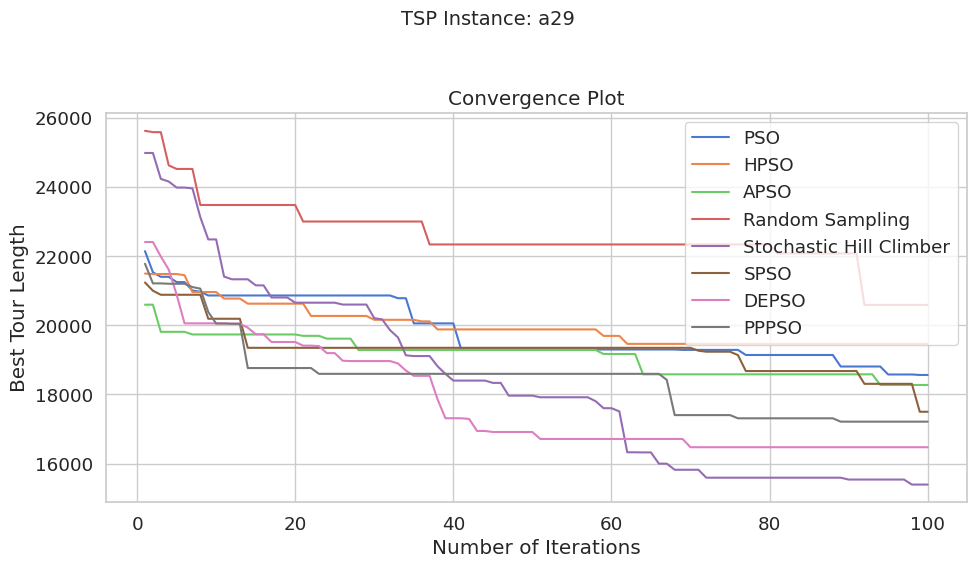

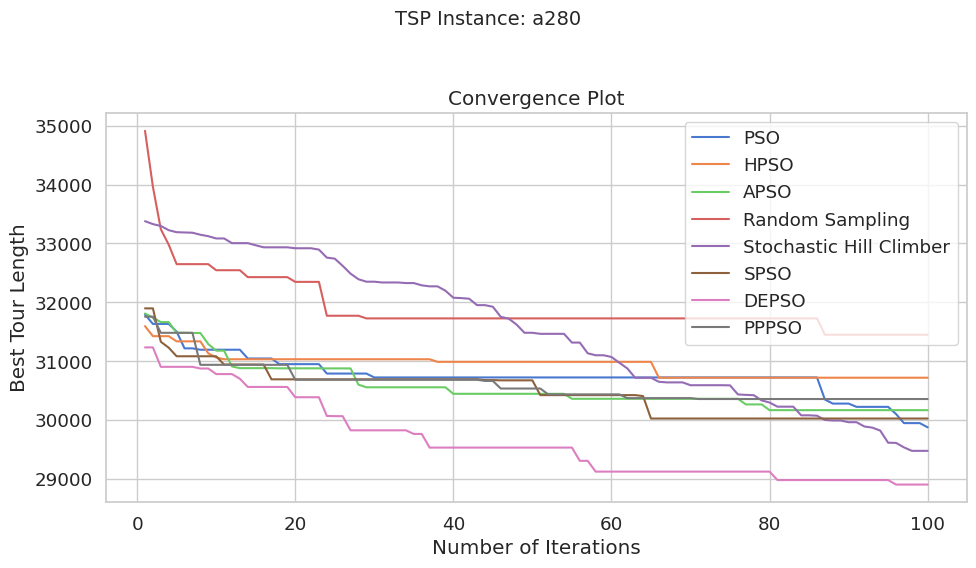

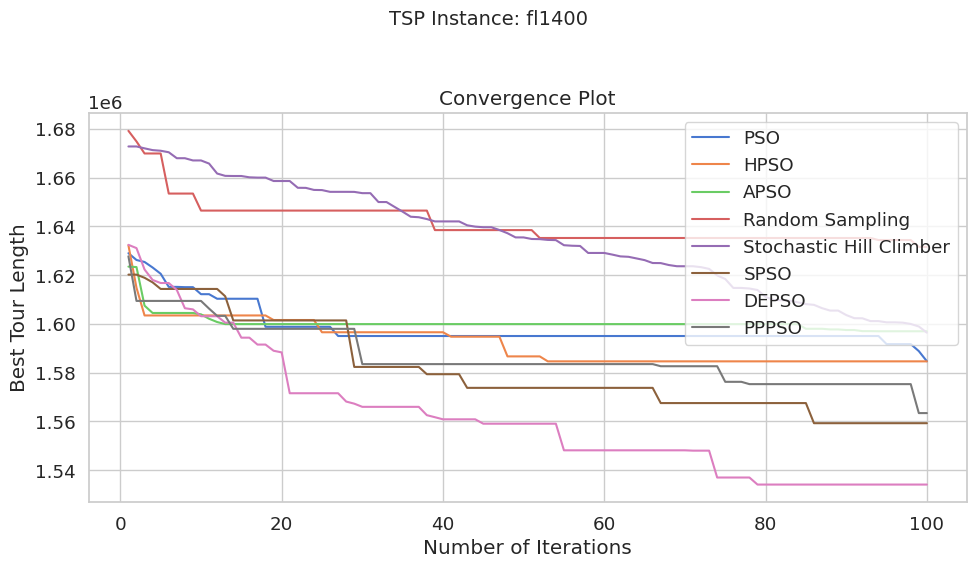

In [2]:
#from utils import *
from utilstest import *
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


## 3. Experiments
### 3.1. Experiment 1: Impact of population size on tour length



| Algorithm                        | Optimal Population Size | Time Complexity    | Comments                                                                                                                                                                                                                                                   |
|----------------------------------|-------------------------|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Particle Swarm Optimization (PSO) | 60                     | O(I * P * N)| PSO achieves its best performance with a population size of 60. This suggests that a moderate-sized swarm is sufficient for PSO to effectively explore the search space and find good solutions. Increasing the population size beyond 60 may not provide significant improvements and could lead to increased computational cost. |
| Adaptive PSO (APSO)              | 100                    | O(I * P * N) | APSO benefits from a larger population size compared to standard PSO. The adaptive mechanism in APSO allows it to adjust the inertia weight based on the search progress, which may require a larger population to maintain diversity and avoid premature convergence. A population size of 100 seems to strike a good balance between exploration and exploitation for APSO. |
| Discrete PSO (HPSO)              | 100                   | O(I * P * N)  | HPSO also performs well with a population size of 100. The discrete nature of the TSP solution space may require a larger population to effectively explore various permutations of cities. The increased population size helps HPSO to maintain a diverse set of solutions and avoid getting stuck in local optima. |
| Spatial PSO (SPSO)               | 100                   | O(I * P * N*K)  | The optimal population size of 100 indicates that SPSO benefits from a larger population to effectively exploit the local information within neighborhoods. The increased population size allows SPSO to explore different regions of the search space while maintaining a good balance between local and global search. |
| Differential Evolution PSO (DEPSO) | 60                    | O(I * P * N)  | DEPSO achieves its best performance with a population size of 60. That is similar to standard PSO. The differential evolution component in DEPSO helps in generating new candidate solutions which may compensate for the need for a larger population. A moderate population size of 60 seems to be sufficient for DEPSO to explore the search space effectively. The only caveat is the longer run time of the algorithm with larger population sizes |
| Predator-Prey PSO (PPPSO)        | 100                   | O(I * P * N)   | PPPSO performs well with a population size of 100. The predator-prey dynamics introduced in PPPSO may require a larger population to maintain a balance between the predator and prey particles. The increased population size allows for more diverse interactions and helps in escaping local optima. |
| Random Sampling                  | 20                    | O(I * N)   | Random Sampling is a simple algorithm that generates random solutions without any intelligent search strategy. The optimal population size of 20 suggests that increasing the population size beyond this point does not provide significant improvements in solution quality. Random Sampling relies on the randomness of the generated solutions rather than the population size. |
| Stochastic Hill Climber          | 20                    | O(I * N)    | Stochastic Hill Climber  iteratively improves a single solution.Thus, The optimal population size of 20 indicates that the algorithm does not require a large population since it focuses on a single solution at a time. Increasing the population size may not have a significant impact on the performance of Stochastic Hill Climber. |




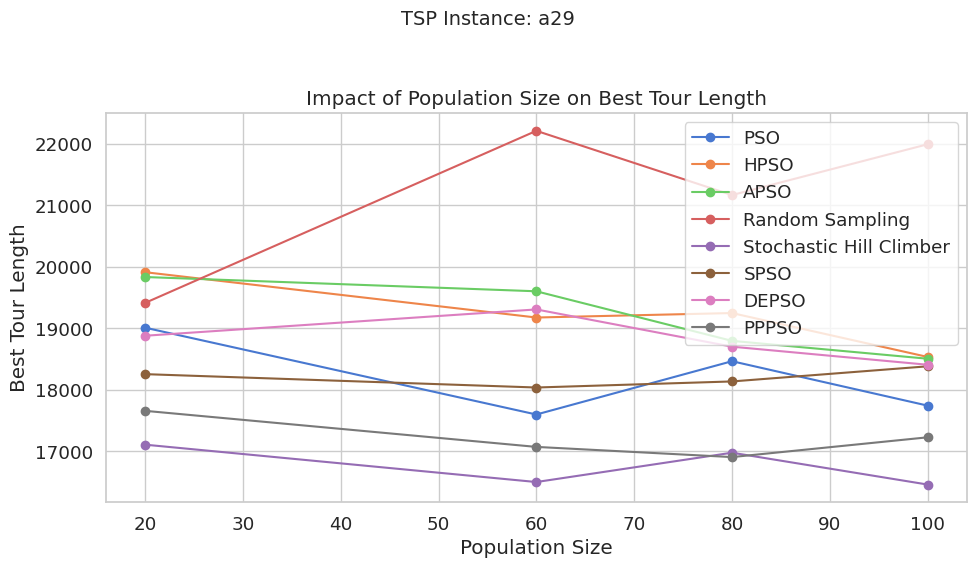

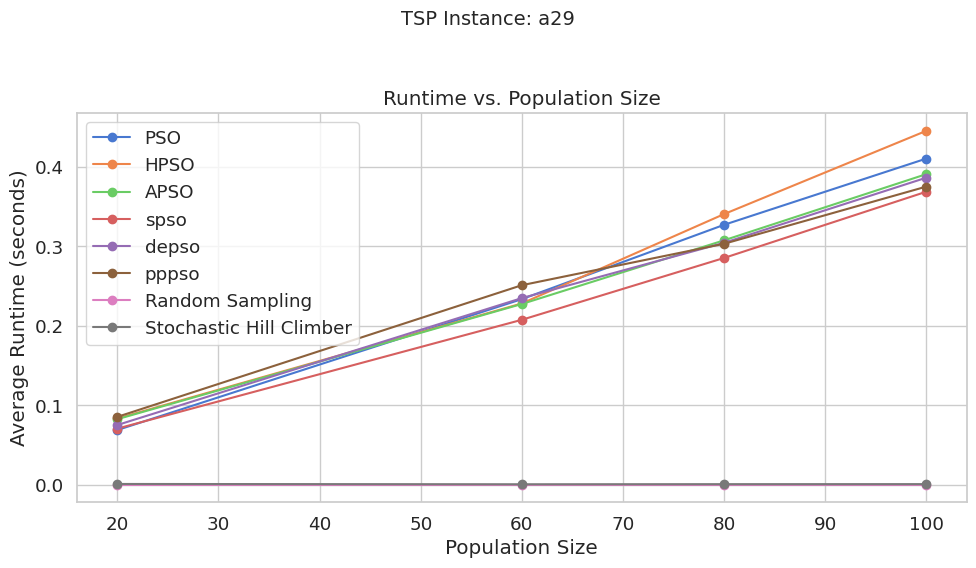

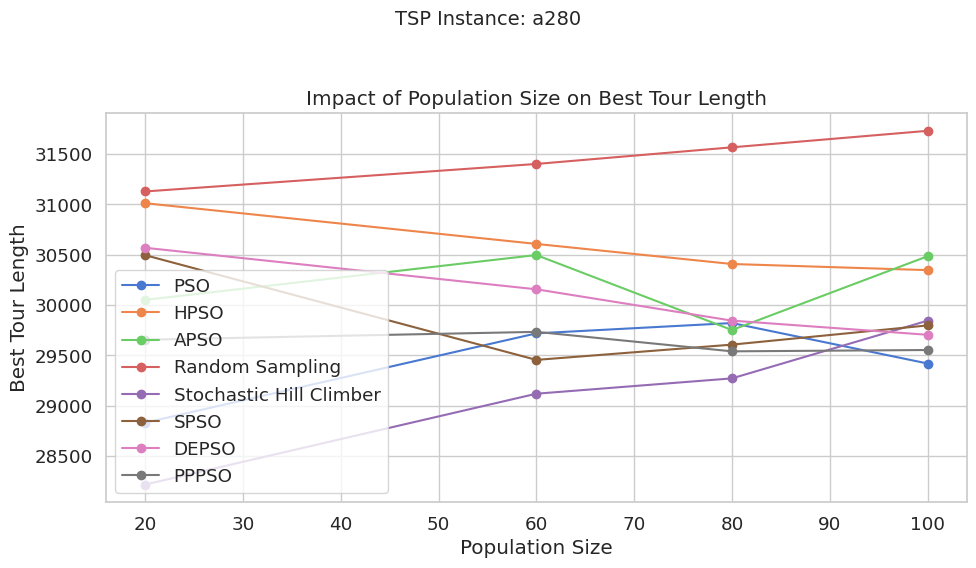

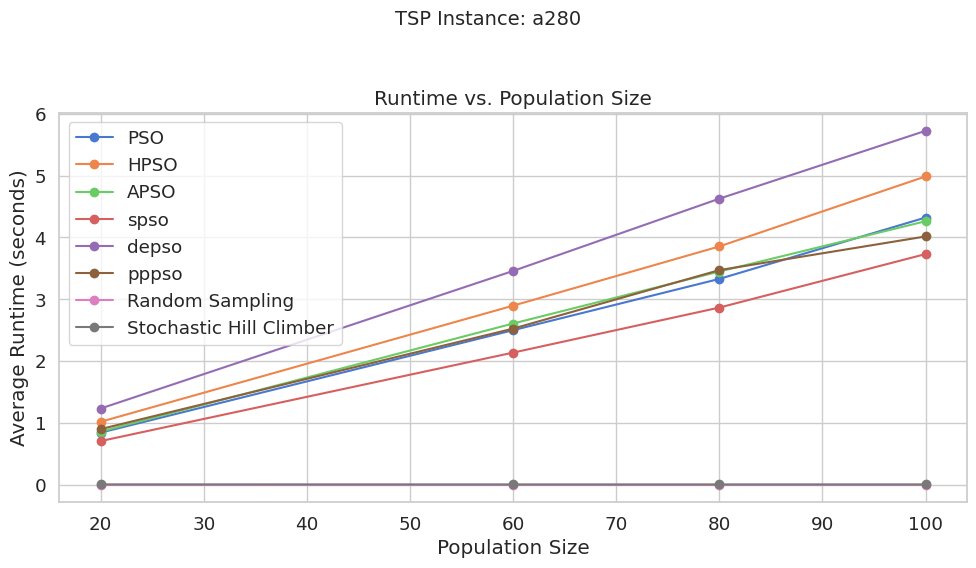

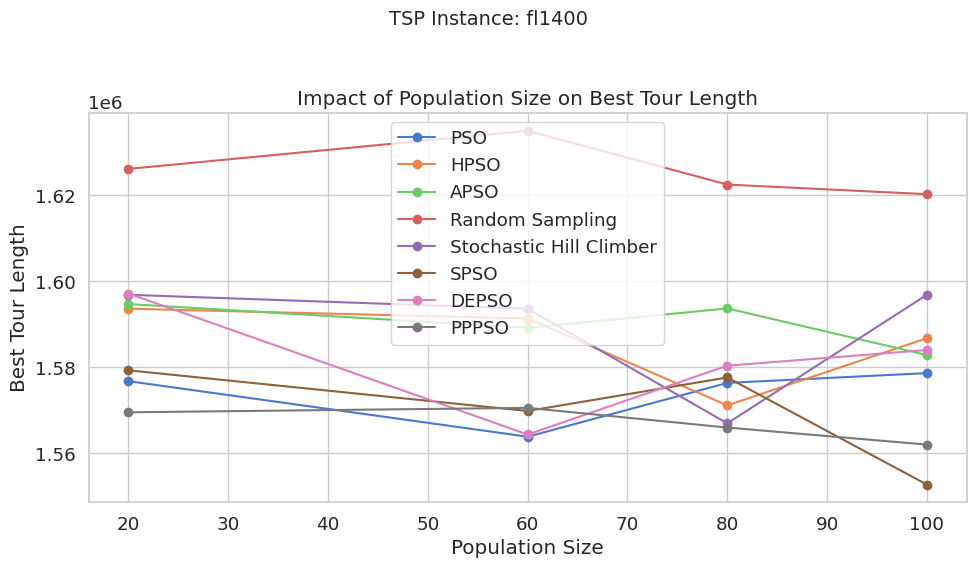

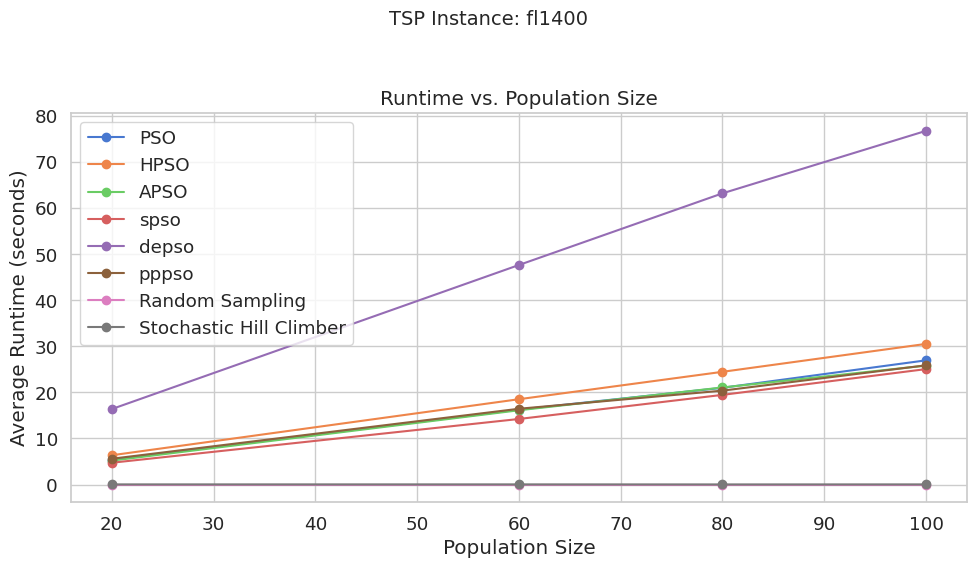

In [3]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

### 3.2. Experiment 2: Inertia Weight

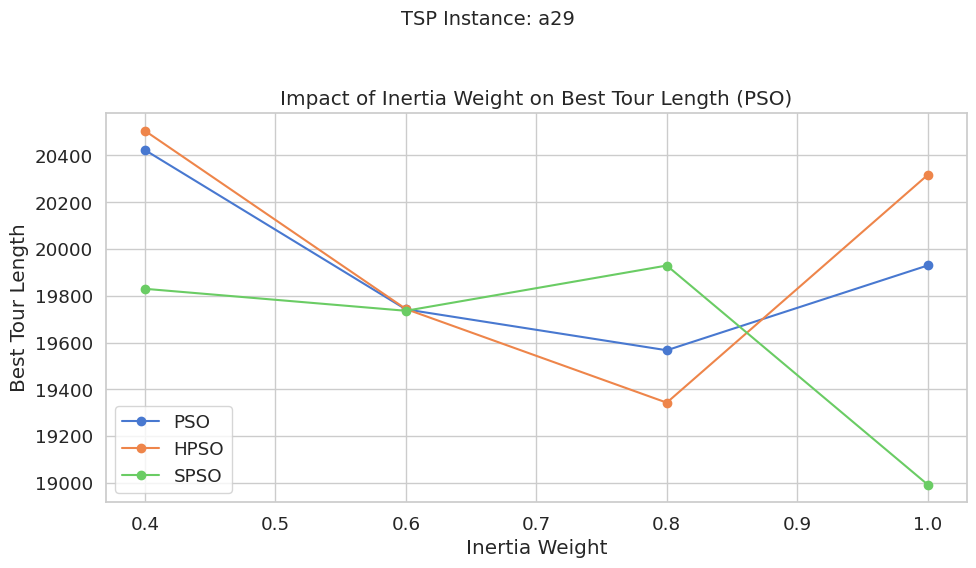

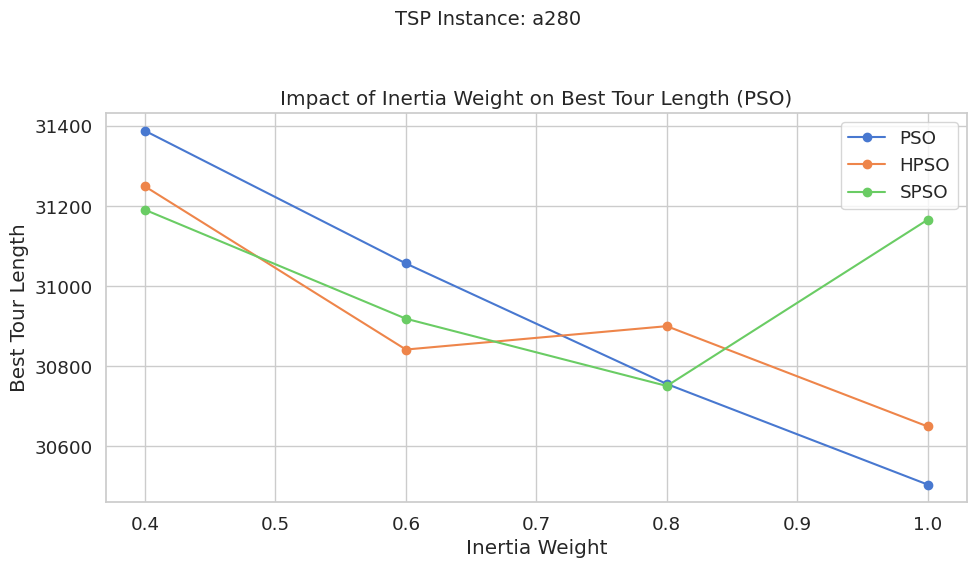

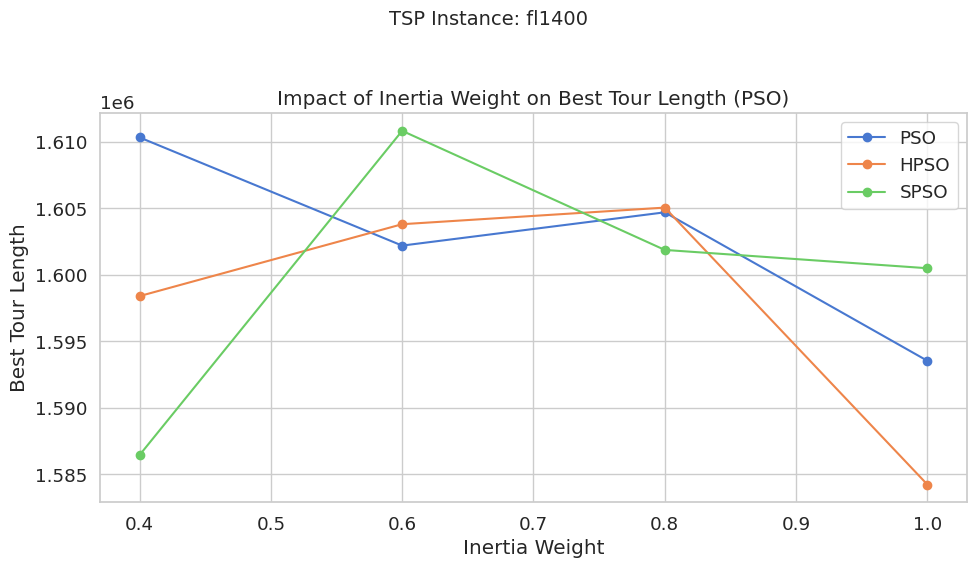

In [4]:
# 1min 11 : runexp parallel run algo sequentially
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

### 3.3. Experiment 3: Acceleration Coefficients

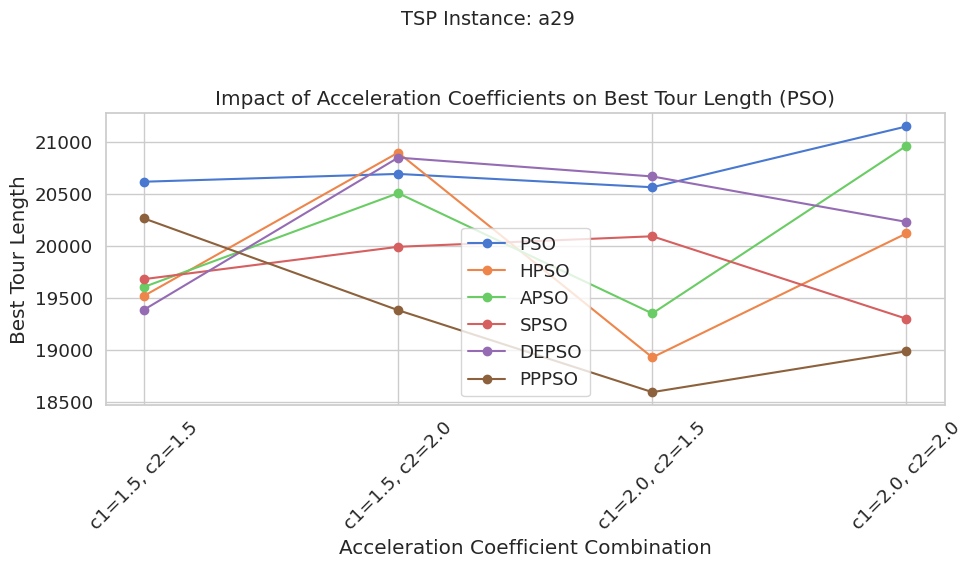

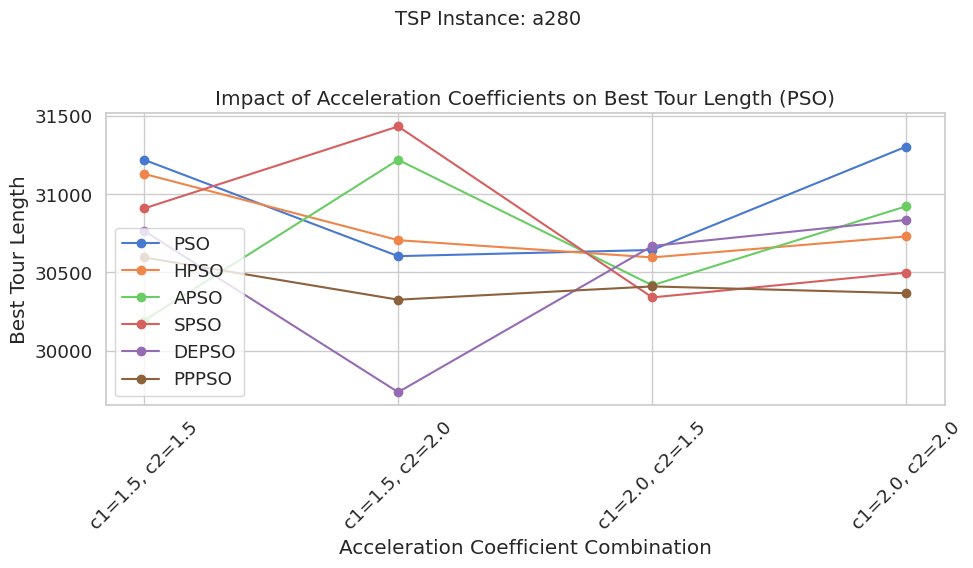

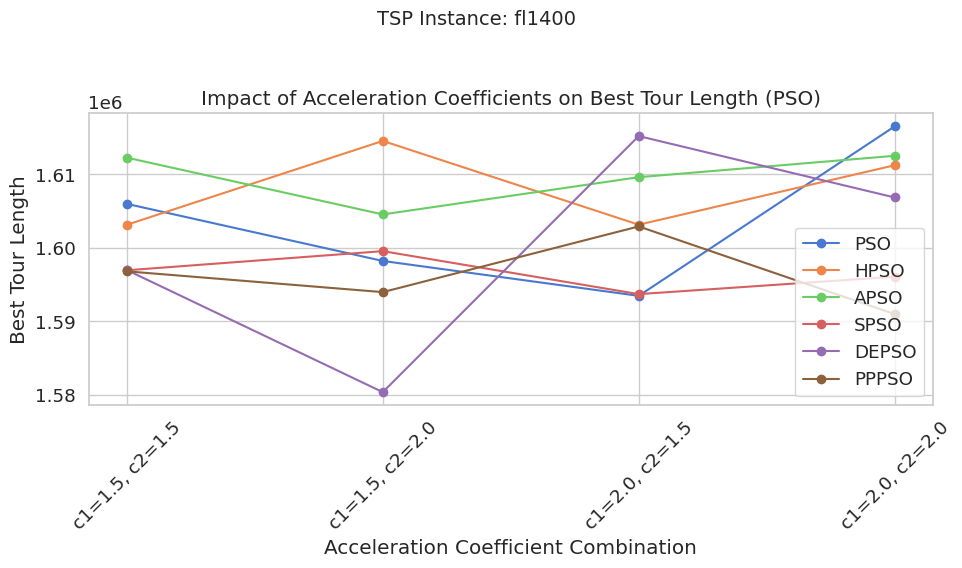

In [5]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)


### 3.4. Experiment 4: w_min and w_max

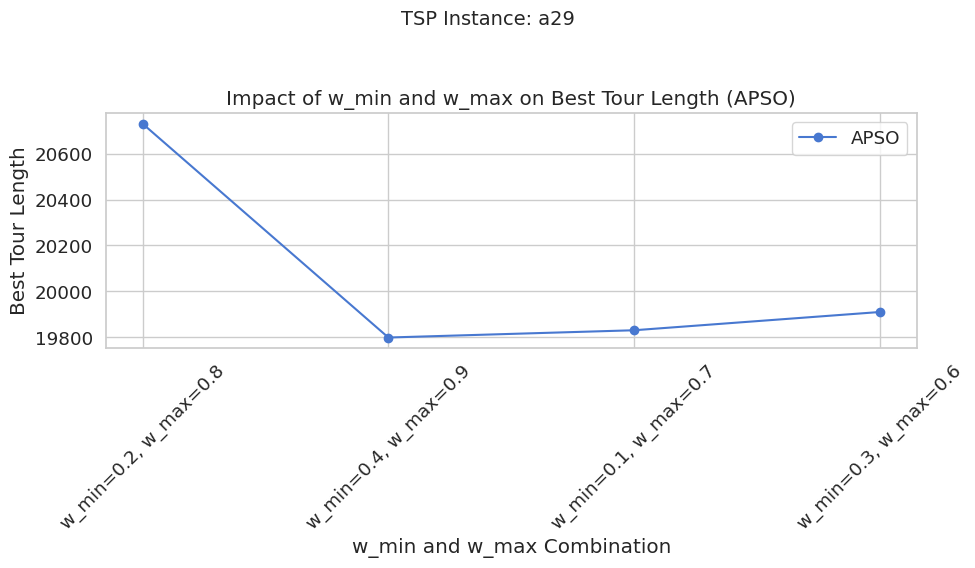

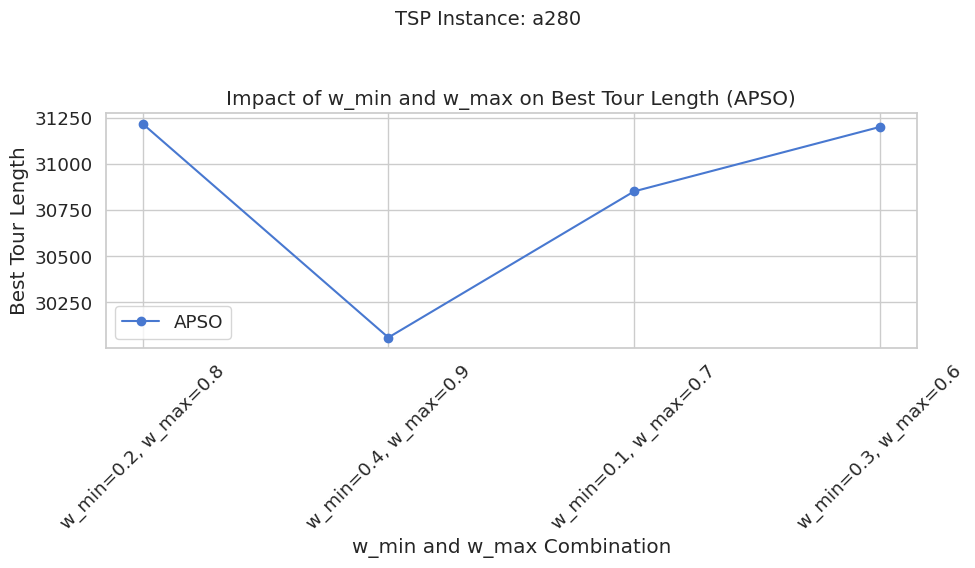

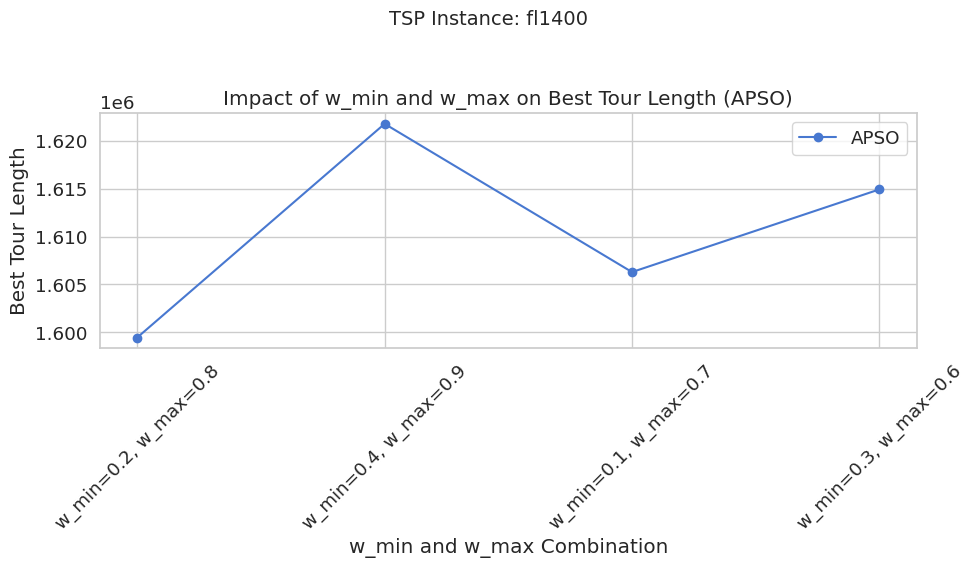

In [6]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)

### 3.5. Experiment 5: Neighborhood Size

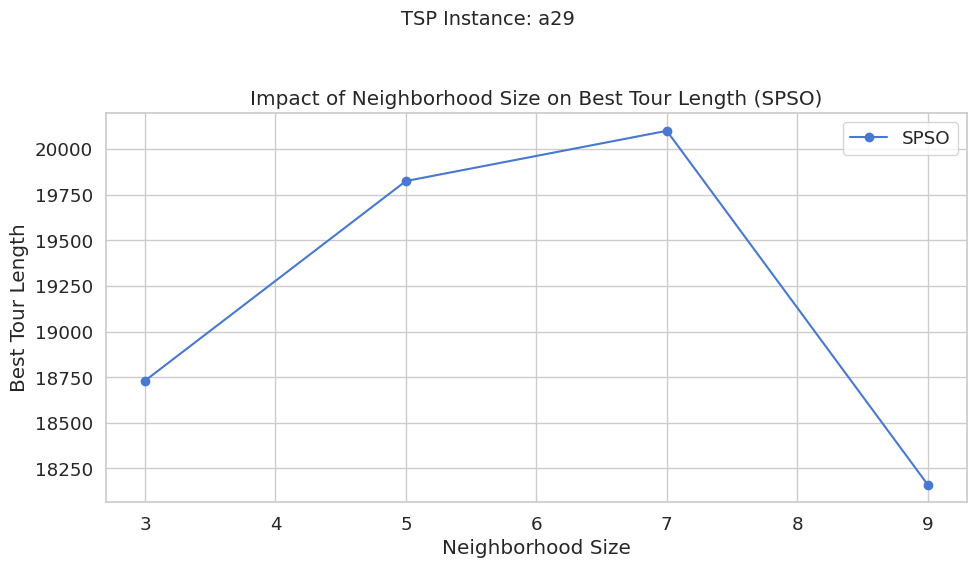

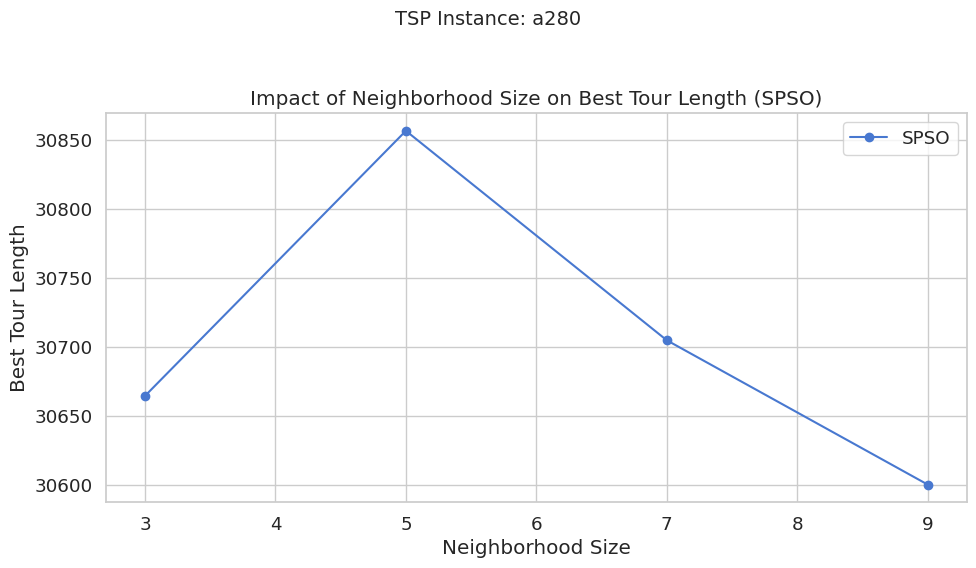

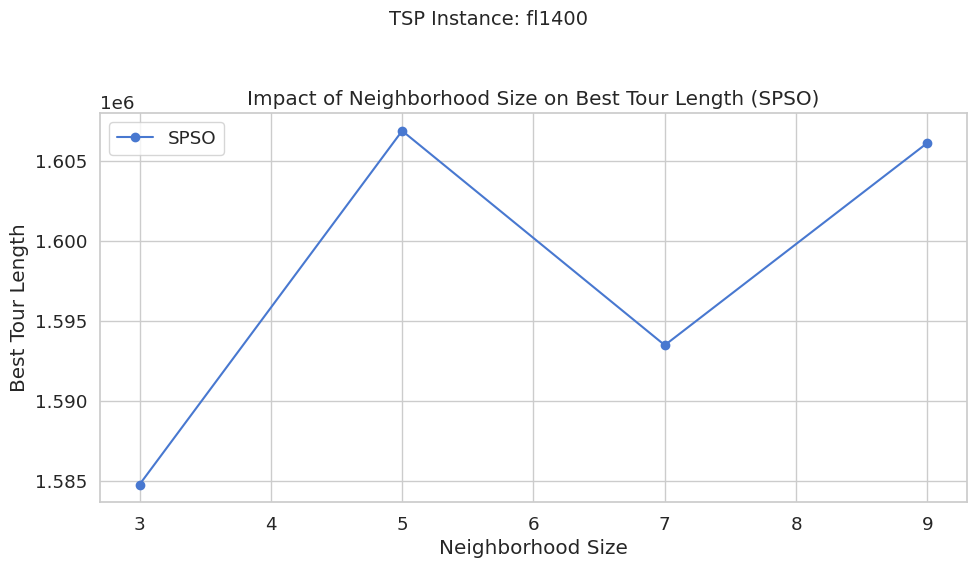

In [7]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)



### 3.6. Experiment 6: Crossover Rate and Mutation Rate

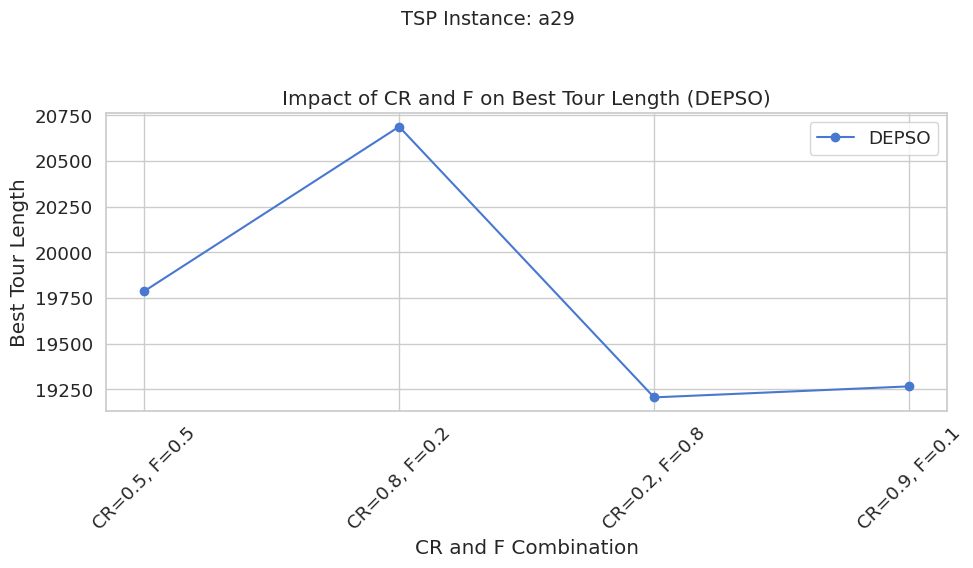

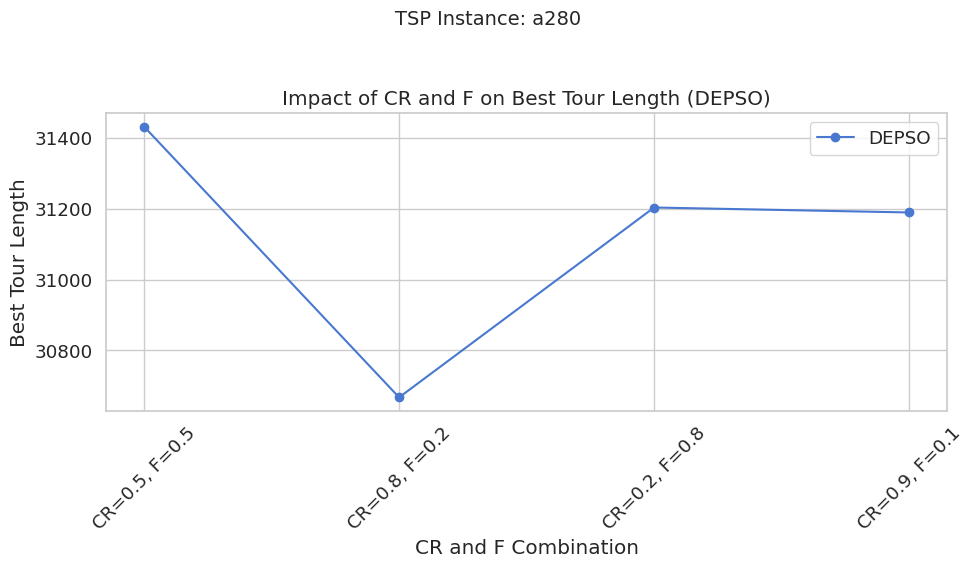

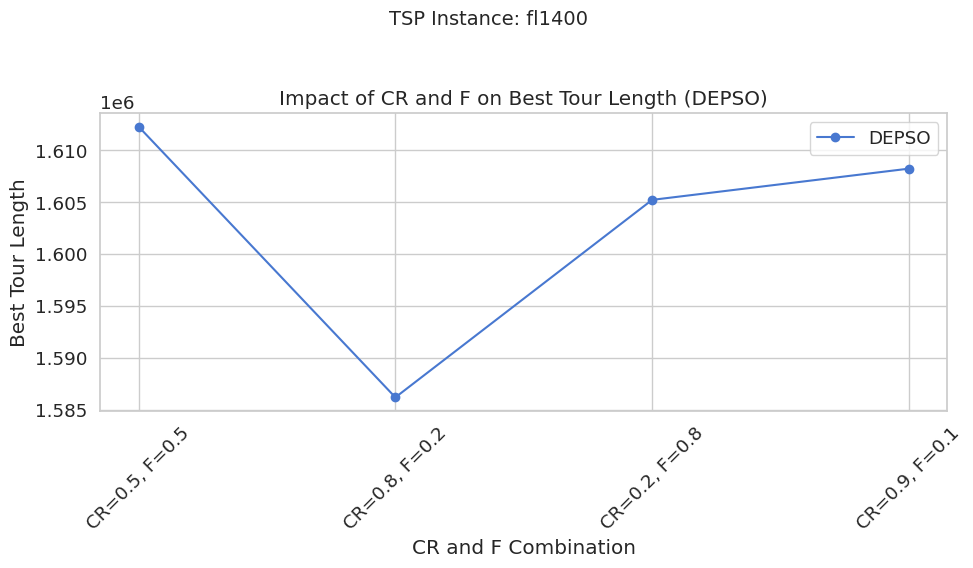

In [8]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

### 3.7. Experiment 7: Fear Factor

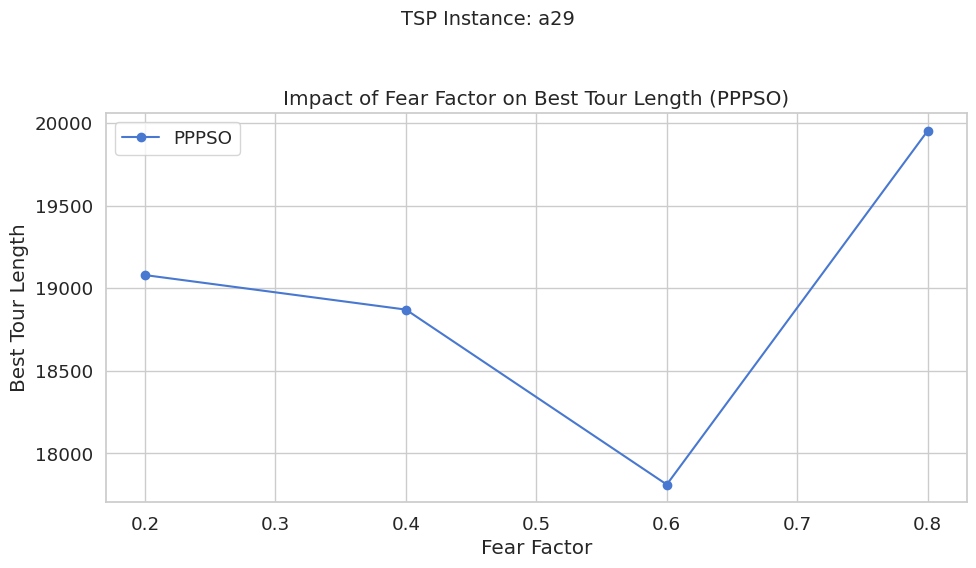

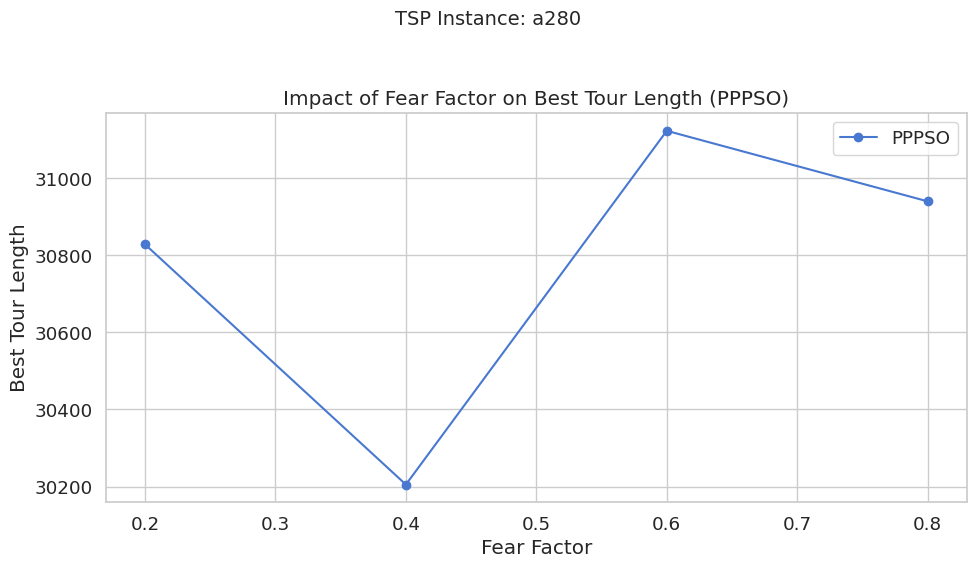

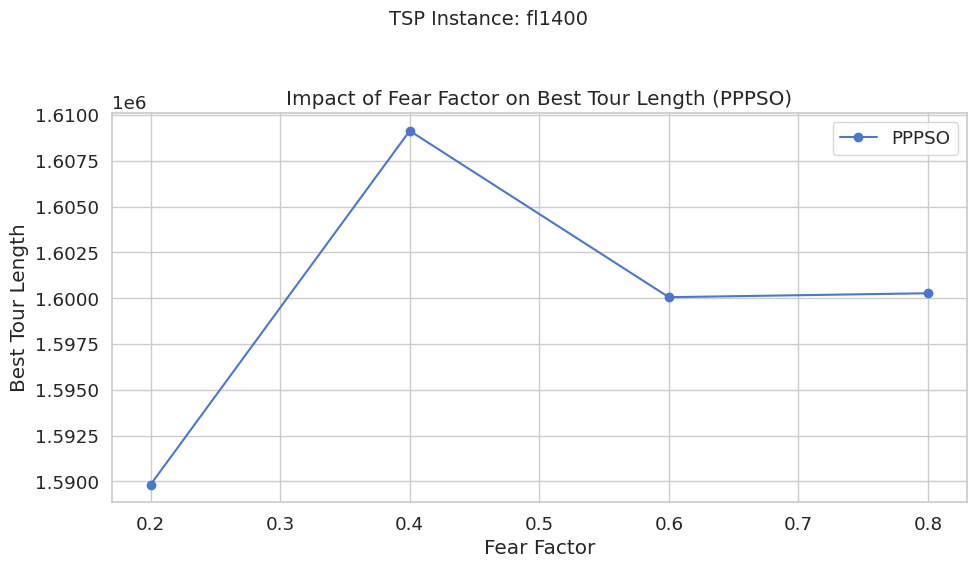

In [9]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)


### 3.8. Experiment 8: max_iterations

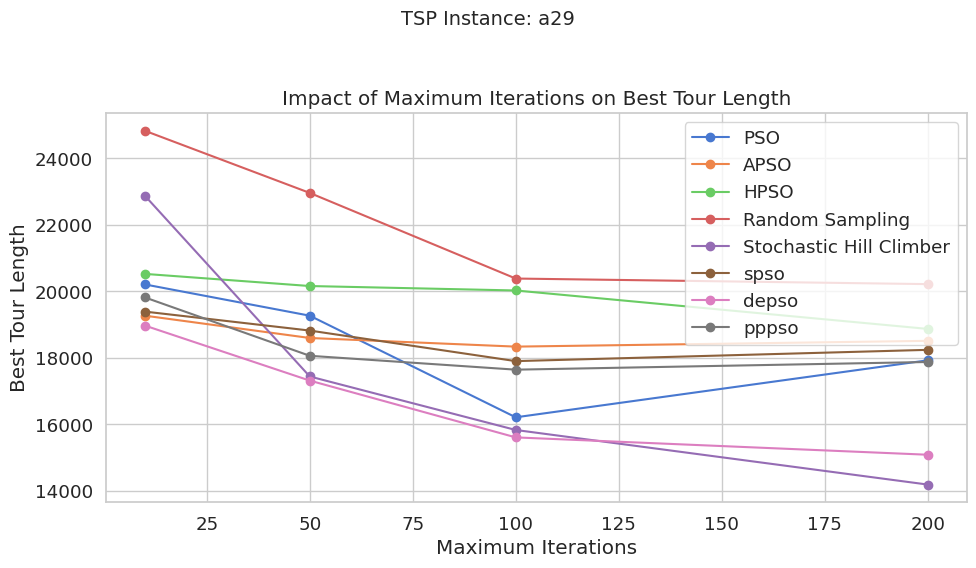

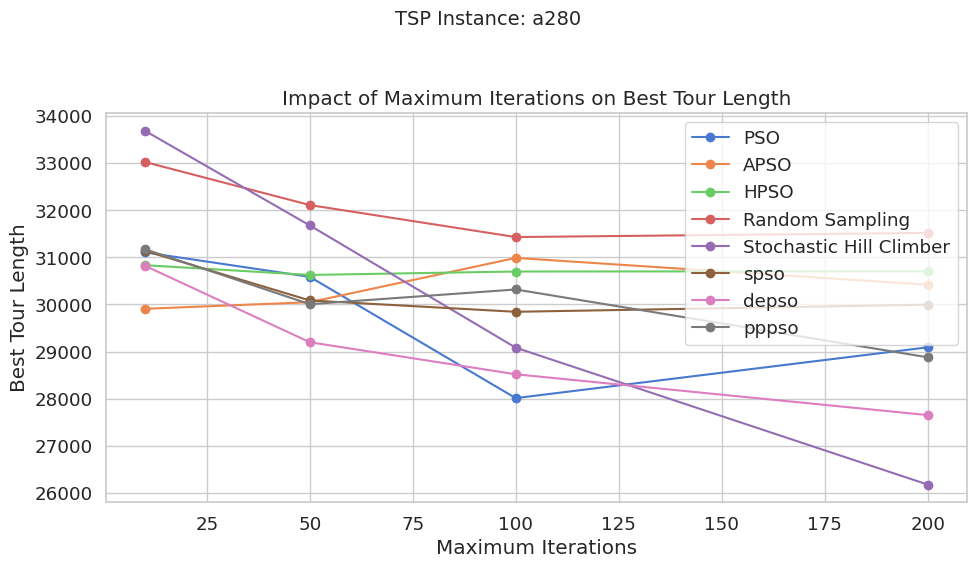

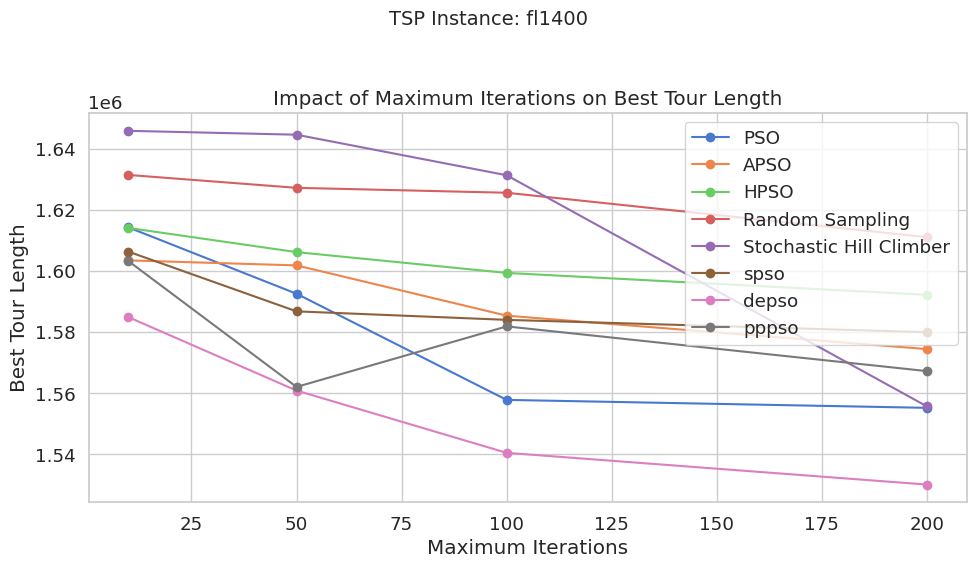

In [10]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])




## 4. Conclusion

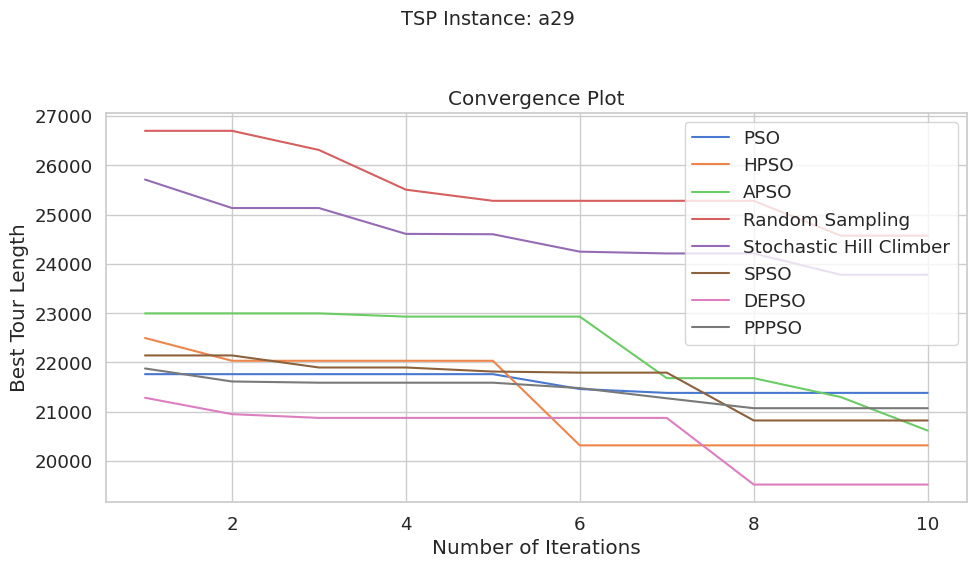

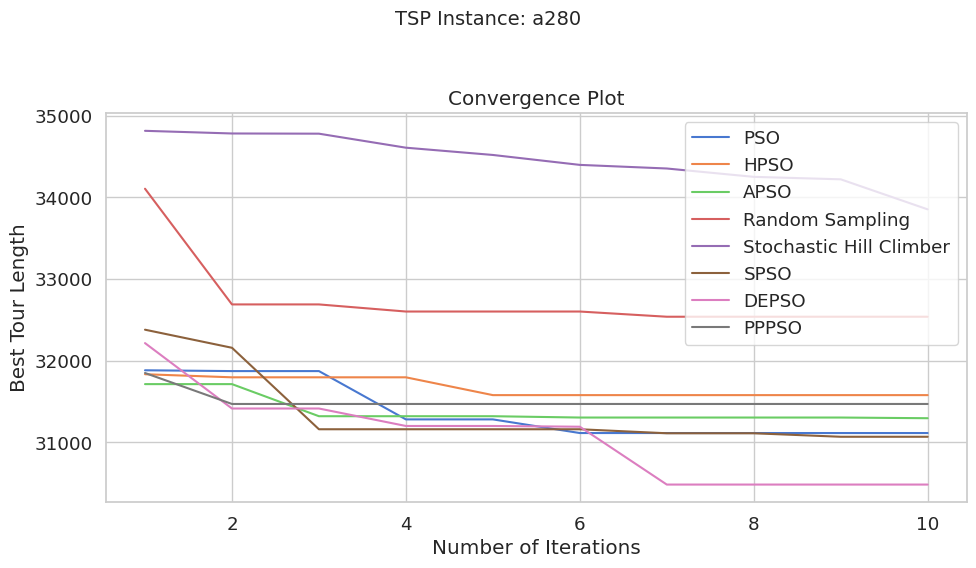

In [11]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()



In [12]:
end_time = time.time()
print("Execution time: ", end_time - start_time)

Execution time:  482.23454880714417
